In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import requests
import re
from selenium import webdriver
import network as nx
import pickle


In [2]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00


In [3]:
!pip install network

  Preparing metadata (setup.py) ... done
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3138 sha256=b284ef67a5772314184dc39aefa0c51d48f36bb498c8b5c38a44ee2a4d6fe959
  Stored in directory: /root/.cache/pip/wheels/25/97/b1/563d3a70ed8f588bf9cf448f079024a9751b54d15a0ce3d46b
Successfully built network


In [5]:
data=pd.read_csv('/content/drive/MyDrive/new shama trial/phishing_site_urls.csv')

In [6]:
data.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [7]:
data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [9]:
data.isnull().sum()

,0
URL,0
Label,0


In [10]:
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


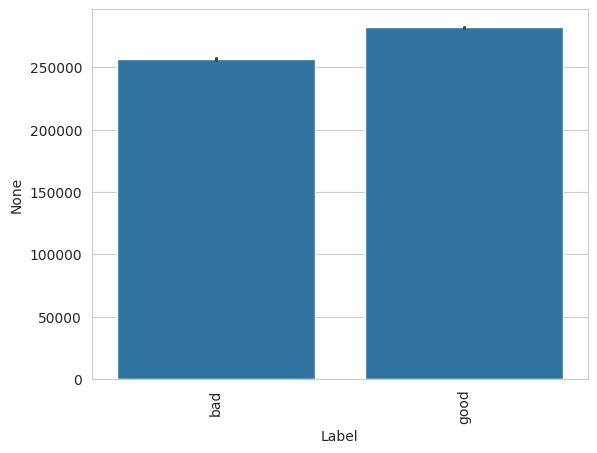

In [11]:
sns.set_style('whitegrid')
sns.barplot(x=data.Label,y=data.index)
plt.xticks(rotation=90)
plt.show()


A tokenizer splits a string

In [12]:
tokenizer=RegexpTokenizer(r'[A-Za-z]+')

In [13]:
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [14]:
data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [15]:
data.URL[1]

'www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php'

In [16]:
tokenizer.tokenize(data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [17]:
print('Tokenizer started and it is converting to Tokens')
t0=time.perf_counter()
data['Tokens']=data.URL.map(lambda x:tokenizer.tokenize(x))
t1=time.perf_counter()-t0
print(f'Tokenizer finished in {t1:0.4f} seconds')
end=time.time()

Tokenizer started and it is converting to Tokens
Tokenizer finished in 3.4708 seconds


In [18]:
data.sample(10)

,URL,Label,Tokens
94978,gfhiryuu.tripod.com/random/index.html,good,"[gfhiryuu, tripod, com, random, index, html]"
497267,muscleinjuries.com/fs56qjqt,bad,"[muscleinjuries, com, fs, qjqt]"
349961,harvardsquarelibrary.org/cfs/charles_francis_a...,good,"[harvardsquarelibrary, org, cfs, charles, fran..."
170099,en.wikipedia.org/wiki/1973_Montreal_Expos_season,good,"[en, wikipedia, org, wiki, Montreal, Expos, se..."
166318,donpaulpublishing.com/,good,"[donpaulpublishing, com]"
253660,upcoming.yahoo.com/event/8374570/MO/Kansas-Cit...,good,"[upcoming, yahoo, com, event, MO, Kansas, City..."
173321,en.wikipedia.org/wiki/Christof_Koch,good,"[en, wikipedia, org, wiki, Christof, Koch]"
86954,www.dsg.cs.tcd.ie/~coyote/,good,"[www, dsg, cs, tcd, ie, coyote]"
127028,suengineers.com/efs/language/bene_fit_s.html,bad,"[suengineers, com, efs, language, bene, fit, s..."
194734,gramercyimages.com/,good,"[gramercyimages, com]"


Snowball Stemmer......small string processing language give its root words

In [19]:
stemmer=SnowballStemmer('english')

In [20]:
print('Converting strings to its root words')
t0=time.perf_counter()
data['Stemmed_tokens']=data['Tokens'].map(lambda x:[stemmer.stem(word) for word in x])
t1=time.perf_counter()-t0
print(f'Converting finished in {t1:0.4f} seconds')

Converting strings to its root words
Converting finished in 60.1925 seconds


In [21]:
data.sample(10)

,URL,Label,Tokens,Stemmed_tokens
83234,sourceforge.net/projects/hipergate/,good,"[sourceforge, net, projects, hipergate]","[sourceforg, net, project, hiperg]"
331503,facebook.com/people/Dean-Marshall/671487114,good,"[facebook, com, people, Dean, Marshall]","[facebook, com, peopl, dean, marshal]"
33082,imprimimosya.com/Chase/Fullz/,bad,"[imprimimosya, com, Chase, Fullz]","[imprimimosya, com, chase, fullz]"
191489,fullonlinebooks.com/W-S-Gilbert-s-Poem-The-Bri...,good,"[fullonlinebooks, com, W, S, Gilbert, s, Poem,...","[fullonlinebook, com, w, s, gilbert, s, poem, ..."
270472,airliners.net/search/photo.search?album=12038&...,good,"[airliners, net, search, photo, search, album,...","[airlin, net, search, photo, search, album, th..."
297372,cadillacfairview.com/Notesdata/HR/CF_LP4W_LND_...,good,"[cadillacfairview, com, Notesdata, HR, CF, LP,...","[cadillacfairview, com, notesdata, hr, cf, lp,..."
445789,thenavarres.com/genealogy/getperson.php?person...,good,"[thenavarres, com, genealogy, getperson, php, ...","[thenavarr, com, genealog, getperson, php, per..."
419431,radio-locator.com/info/KEXS-AM,good,"[radio, locator, com, info, KEXS, AM]","[radio, locat, com, info, kex, am]"
310218,cr.nps.gov/nr/travel/detroit/,good,"[cr, nps, gov, nr, travel, detroit]","[cr, nps, gov, nr, travel, detroit]"
481091,publicationsduquebec.gouv.qc.ca/dynamicSearch/...,good,"[publicationsduquebec, gouv, qc, ca, dynamicSe...","[publicationsduquebec, gouv, qc, ca, dynamicse..."


In [22]:
print('Getting Joining Words')
t0=time.perf_counter()
data['Joined_tokens']=data['Stemmed_tokens'].map(lambda x:' '.join(x))
t1=time.perf_counter()-t0
print(f'Joining finished in {t1:0.4f} seconds')


Getting Joining Words
Joining finished in 0.2844 seconds


In [23]:
data.sample(10)

,URL,Label,Tokens,Stemmed_tokens,Joined_tokens
477221,youtube.com/watch?v=mtL_RqTBDi8,good,"[youtube, com, watch, v, mtL, RqTBDi]","[youtub, com, watch, v, mtl, rqtbdi]",youtub com watch v mtl rqtbdi
396524,mylife.com/colleges/ca/oakland/holy-names-univ...,good,"[mylife, com, colleges, ca, oakland, holy, nam...","[mylif, com, colleg, ca, oakland, holi, name, ...",mylif com colleg ca oakland holi name univers
321864,encyclopedia.com/topic/Publishing.aspx,good,"[encyclopedia, com, topic, Publishing, aspx]","[encyclopedia, com, topic, publish, aspx]",encyclopedia com topic publish aspx
456463,usafband.af.mil/questions/topic.asp?id=954,good,"[usafband, af, mil, questions, topic, asp, id]","[usafband, af, mil, question, topic, asp, id]",usafband af mil question topic asp id
401230,mytravelguide.com/attractions/profile-79059705...,good,"[mytravelguide, com, attractions, profile, Can...","[mytravelguid, com, attract, profil, canada, q...",mytravelguid com attract profil canada quebec ...
521119,commoditiessellers.net/june/post.php,bad,"[commoditiessellers, net, june, post, php]","[commoditiessel, net, june, post, php]",commoditiessel net june post php
130728,url.snd54.ch/url-677041563-2830495-22012016.html,bad,"[url, snd, ch, url, html]","[url, snd, ch, url, html]",url snd ch url html
445836,thenudestar.com/Juliet-Anderson.html,good,"[thenudestar, com, Juliet, Anderson, html]","[thenudestar, com, juliet, anderson, html]",thenudestar com juliet anderson html
366512,jpost.com/topic/Russian_language,good,"[jpost, com, topic, Russian, language]","[jpost, com, topic, russian, languag]",jpost com topic russian languag
515166,91.239.24.11:6892,bad,[],[],


In [24]:
bad_sites=data[data.Label=='bad']
good_sites=data[data.Label=='good']

In [25]:
pd.options.display.max_colwidth=200

In [26]:
bad_sites.head()

,URL,Label,Tokens,Stemmed_tokens,Joined_tokens
0,nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe, com, en, cgi, bin, verification, login, ffb, d, dca, cce, f, index, php, cmd, profile, ach, outdated, page, tmpl, p, gen, failed, to, load, nav, log...","[nobel, it, ffb, d, dca, cce, f, login, skype, com, en, cgi, bin, verif, login, ffb, d, dca, cce, f, index, php, cmd, profil, ach, outdat, page, tmpl, p, gen, fail, to, load, nav, login, access]",nobel it ffb d dca cce f login skype com en cgi bin verif login ffb d dca cce f index php cmd profil ach outdat page tmpl p gen fail to load nav login access
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin, webscrcmd, home, customer, nav, loading, php]","[www, dghjdgf, com, paypal, co, uk, cycgi, bin, webscrcmd, home, custom, nav, load, php]",www dghjdgf com paypal co uk cycgi bin webscrcmd home custom nav load php
2,serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/,bad,"[serviciosbys, com, paypal, cgi, bin, get, into, herf, secure, dispatch, rzr, dsf, href, href, href, secure, center, update, limit, seccure, d, a, ff, c, a, e, a, c, fd]","[serviciosbi, com, paypal, cgi, bin, get, into, herf, secur, dispatch, rzr, dsf, href, href, href, secur, center, updat, limit, seccur, d, a, ff, c, a, e, a, c, fd]",serviciosbi com paypal cgi bin get into herf secur dispatch rzr dsf href href href secur center updat limit seccur d a ff c a e a c fd
3,mail.printakid.com/www.online.americanexpress.com/index.html,bad,"[mail, printakid, com, www, online, americanexpress, com, index, html]","[mail, printakid, com, www, onlin, americanexpress, com, index, html]",mail printakid com www onlin americanexpress com index html
4,thewhiskeydregs.com/wp-content/themes/widescreen/includes/temp/promocoessmiles/?84784787824HDJNDJDSJSHD//2724782784/,bad,"[thewhiskeydregs, com, wp, content, themes, widescreen, includes, temp, promocoessmiles, HDJNDJDSJSHD]","[thewhiskeydreg, com, wp, content, theme, widescreen, includ, temp, promocoessmil, hdjndjdsjshd]",thewhiskeydreg com wp content theme widescreen includ temp promocoessmil hdjndjdsjshd


In [27]:
good_sites.head(10)

,URL,Label,Tokens,Stemmed_tokens,Joined_tokens
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/?ref5M+9d'bbws&b`|tNEfnud&d­\rÅjYÖJplR+CmP !¡6Ô~PÖtÓ¶P8~·Äëiq°ôß|±½$~.ë½ ü·ÝjQ³dì÷VTøsrDiG[v' éòå¯êYÃò«Ù¾FkþàâFV#àÐØ}Ú ¨%¡x(My...,good,"[esxcc, com, js, index, htm, us, battle, net, noghn, en, ref, M, d, bbws, b, tNEfnud, d, j, Y, J, p, lR, CmP, P, t, P, i, q, jQ, d, VT, srDiG, v, Y, Fk, FV, x, My, R, s, kI, zb, TU, Em, q, lMJ, c,...","[esxcc, com, js, index, htm, us, battl, net, noghn, en, ref, m, d, bbws, b, tnefnud, d, j, y, j, p, lr, cmp, p, t, p, i, q, jq, d, vt, srdig, v, y, fk, fv, x, my, r, s, ki, zb, tu, em, q, lmj, c, ...",esxcc com js index htm us battl net noghn en ref m d bbws b tnefnud d j y j p lr cmp p t p i q jq d vt srdig v y fk fv x my r s ki zb tu em q lmj c e el l x h j u g ip o i tv d k xo o o c hi f d g...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6(rTÃuæ =g0¾÷mÖiÓ-;XZ\%êýüÉfn&\°%7õÙ:¹u1ÌÑêFÄòW<$cï¦t[0ò>Þj®ÆeV2àpù-íàÇ$E¤ZëÈ²úSÌ¶\tp áSò°i°vþ[«³»]¹\rjlÛW¿]ø¾µj¿;·ªo!ÒPì ...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, u, g, m, i, XZ, fn, u, F, W, c, t, j, eV, p, E, Z, S, p, S, i, v, jl, W, j, o, P, H, C, R, QB, g, Z, D, m, Q, x, b, t, m, N, P, M, Q, A, U, dB, q, Vu,...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, u, g, m, i, xz, fn, u, f, w, c, t, j, ev, p, e, z, s, p, s, i, v, jl, w, j, o, p, h, c, r, qb, g, z, d, m, q, x, b, t, m, n, p, m, q, a, u, db, q, vu,...",www eira nvinip nch wv ydah ye u rt u g m i xz fn u f w c t j ev p e z s p s i v jl w j o p h c r qb g z d m q x b t m n p m q a u db q vu r h j
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij!R\gr0âÕ5dfe<á<cmg&¤Gh!C<ò¡B-¨¨¼ ¬é'?l pýl ÖÒ %ÓaéþùkzHü]z?¹¯úT£bùÙî¬©àæÌì*UA×$Ë]õ³¯=Í ÿ ×ùÁÌ ý¡(~¶Ar¤÷G\$ðQñº¤KÎåcãÇ +¿Èôäþ(...,good,"[www, institutocgr, coo, web, media, syqvem, dk, ij, R, gr, dfe, cmg, G, h, C, B, l, p, l, a, kzH, z, T, b, UA, A, r, G, Q, K, c, s, Q, N, vO, z, c, G, E, ZH, t, VX, qx, N, Pm, dX, An, a, A, c, B,...","[www, institutocgr, coo, web, media, syqvem, dk, ij, r, gr, dfe, cmg, g, h, c, b, l, p, l, a, kzh, z, t, b, ua, a, r, g, q, k, c, s, q, n, vo, z, c, g, e, zh, t, vx, qx, n, pm, dx, an, a, a, c, b,...",www institutocgr coo web media syqvem dk ij r gr dfe cmg g h c b l p l a kzh z t b ua a r g q k c s q n vo z c g e zh t vx qx n pm dx an a a c b a jl m x x u x e b o
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,"ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16b96'g!sD;º6vd9:¤0ð9qt5 ÏN ,s/\nø\n áö ¯ºrê7¶§.m0¤© ê 6ýÍ²:Í`}eîÛ¬Ò5¦zw>0´¸KÕû¸ ÌM¹`ÊoéDâÛ¼ ,cÔ ¡æ>1HÇÕdì³)e>e<E_Ö<e%Ä>ñâû×HËY¥U...",good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc, F, d, b, g, sD, vd, qt, N, s, r, m, e, zw, K, M, o, D, c, H, d, e, e, E, e, H, Y, U, u, m, J, v, bs, U, kP, G, Y, k, DS, g, e, x, O, n, H, Ai, P, vr...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f, d, b, g, sd, vd, qt, n, s, r, m, e, zw, k, m, o, d, c, h, d, e, e, e, e, h, y, u, u, m, j, v, bs, u, kp, g, y, k, ds, g, e, x, o, n, h, ai, p, vr, y]",ruta fm com imag as vie i cf b vc f d b g sd vd qt n s r m e zw k m o d c h d e e e e h y u u m j v bs u kp g y k ds g e x o n h ai p vr y
18237,¾5092,good,[],[],
18238,"esxcc.com/js/index.htm?us.battle.net/login/en/?ref=ifezuzrus.battle.net/d3/en/in$ex&aoð;app cïm-d3B 00-*7-0\rl1,PhµW ;XyOy×vnÙ@áúß©¤<iÆÂÓõòÖôø;.ôâßõ©FÅ»³ùYSÀíÙ§oÜT¾¯I ¨)wN;¾...",good,"[esxcc, com, js, index, htm, us, battle, net, login, en, ref, ifezuzrus, battle, net, d, en, in, ex, ao, app, c, m, d, B, l, Ph, W, XyOy, vn, i, F, YS, o, T, I, wN, f, Cb, n, E, I, U, TVI, C, Q, a...","[esxcc, com, js, index, htm, us, battl, net, login, en, ref, ifezuzrus, battl, net, d, en, in, ex, ao, app, c, m, d, b, l, ph, w, xyoy, vn, i, f, ys, o, t, i, wn, f, cb, n, e, i, u, tvi, c, q, a, ...",esxcc com js index htm us battl net login en ref ifezuzrus battl net d en in ex ao app c m d b l ph w xyoy

Create Word Cloud from important words

In [28]:
def plot_word_cloud(text, mask=None, max_words=400, max_font_size=100, figure_size=(24.0,16.0), title=None, title_size=40, image_color=False):
  stopwords=set(STOPWORDS)
  more_stopwords={'com','http'}
  stopwords=stopwords.union(more_stopwords)
  wordcloud=WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=max_words,
                      max_font_size=max_font_size,
                      random_state=42,
                      mask=mask)
  wordcloud.generate(text)
  plt.figure(figsize=figure_size)
  if image_color:
    image_colors=ImageColorGenerator(mask)
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.title(title, fontdict={'size':title_size, 'color':'black', 'verticalalignment':'bottom'})
  else:
    plt.imshow(wordcloud)
    plt.title(title, fontdict={'size':title_size, 'color':'black', 'verticalalignment':'bottom'})
  plt.axis('off')
  plt.tight_layout()
  plt.show()




In [29]:
data1=good_sites.Joined_tokens
data1.reset_index(drop=True, inplace=True)


In [30]:
data.head()

,URL,Label,Tokens,Stemmed_tokens,Joined_tokens
0,nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe, com, en, cgi, bin, verification, login, ffb, d, dca, cce, f, index, php, cmd, profile, ach, outdated, page, tmpl, p, gen, failed, to, load, nav, log...","[nobel, it, ffb, d, dca, cce, f, login, skype, com, en, cgi, bin, verif, login, ffb, d, dca, cce, f, index, php, cmd, profil, ach, outdat, page, tmpl, p, gen, fail, to, load, nav, login, access]",nobel it ffb d dca cce f login skype com en cgi bin verif login ffb d dca cce f index php cmd profil ach outdat page tmpl p gen fail to load nav login access
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin, webscrcmd, home, customer, nav, loading, php]","[www, dghjdgf, com, paypal, co, uk, cycgi, bin, webscrcmd, home, custom, nav, load, php]",www dghjdgf com paypal co uk cycgi bin webscrcmd home custom nav load php
2,serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/,bad,"[serviciosbys, com, paypal, cgi, bin, get, into, herf, secure, dispatch, rzr, dsf, href, href, href, secure, center, update, limit, seccure, d, a, ff, c, a, e, a, c, fd]","[serviciosbi, com, paypal, cgi, bin, get, into, herf, secur, dispatch, rzr, dsf, href, href, href, secur, center, updat, limit, seccur, d, a, ff, c, a, e, a, c, fd]",serviciosbi com paypal cgi bin get into herf secur dispatch rzr dsf href href href secur center updat limit seccur d a ff c a e a c fd
3,mail.printakid.com/www.online.americanexpress.com/index.html,bad,"[mail, printakid, com, www, online, americanexpress, com, index, html]","[mail, printakid, com, www, onlin, americanexpress, com, index, html]",mail printakid com www onlin americanexpress com index html
4,thewhiskeydregs.com/wp-content/themes/widescreen/includes/temp/promocoessmiles/?84784787824HDJNDJDSJSHD//2724782784/,bad,"[thewhiskeydregs, com, wp, content, themes, widescreen, includes, temp, promocoessmiles, HDJNDJDSJSHD]","[thewhiskeydreg, com, wp, content, theme, widescreen, includ, temp, promocoessmil, hdjndjdsjshd]",thewhiskeydreg com wp content theme widescreen includ temp promocoessmil hdjndjdsjshd


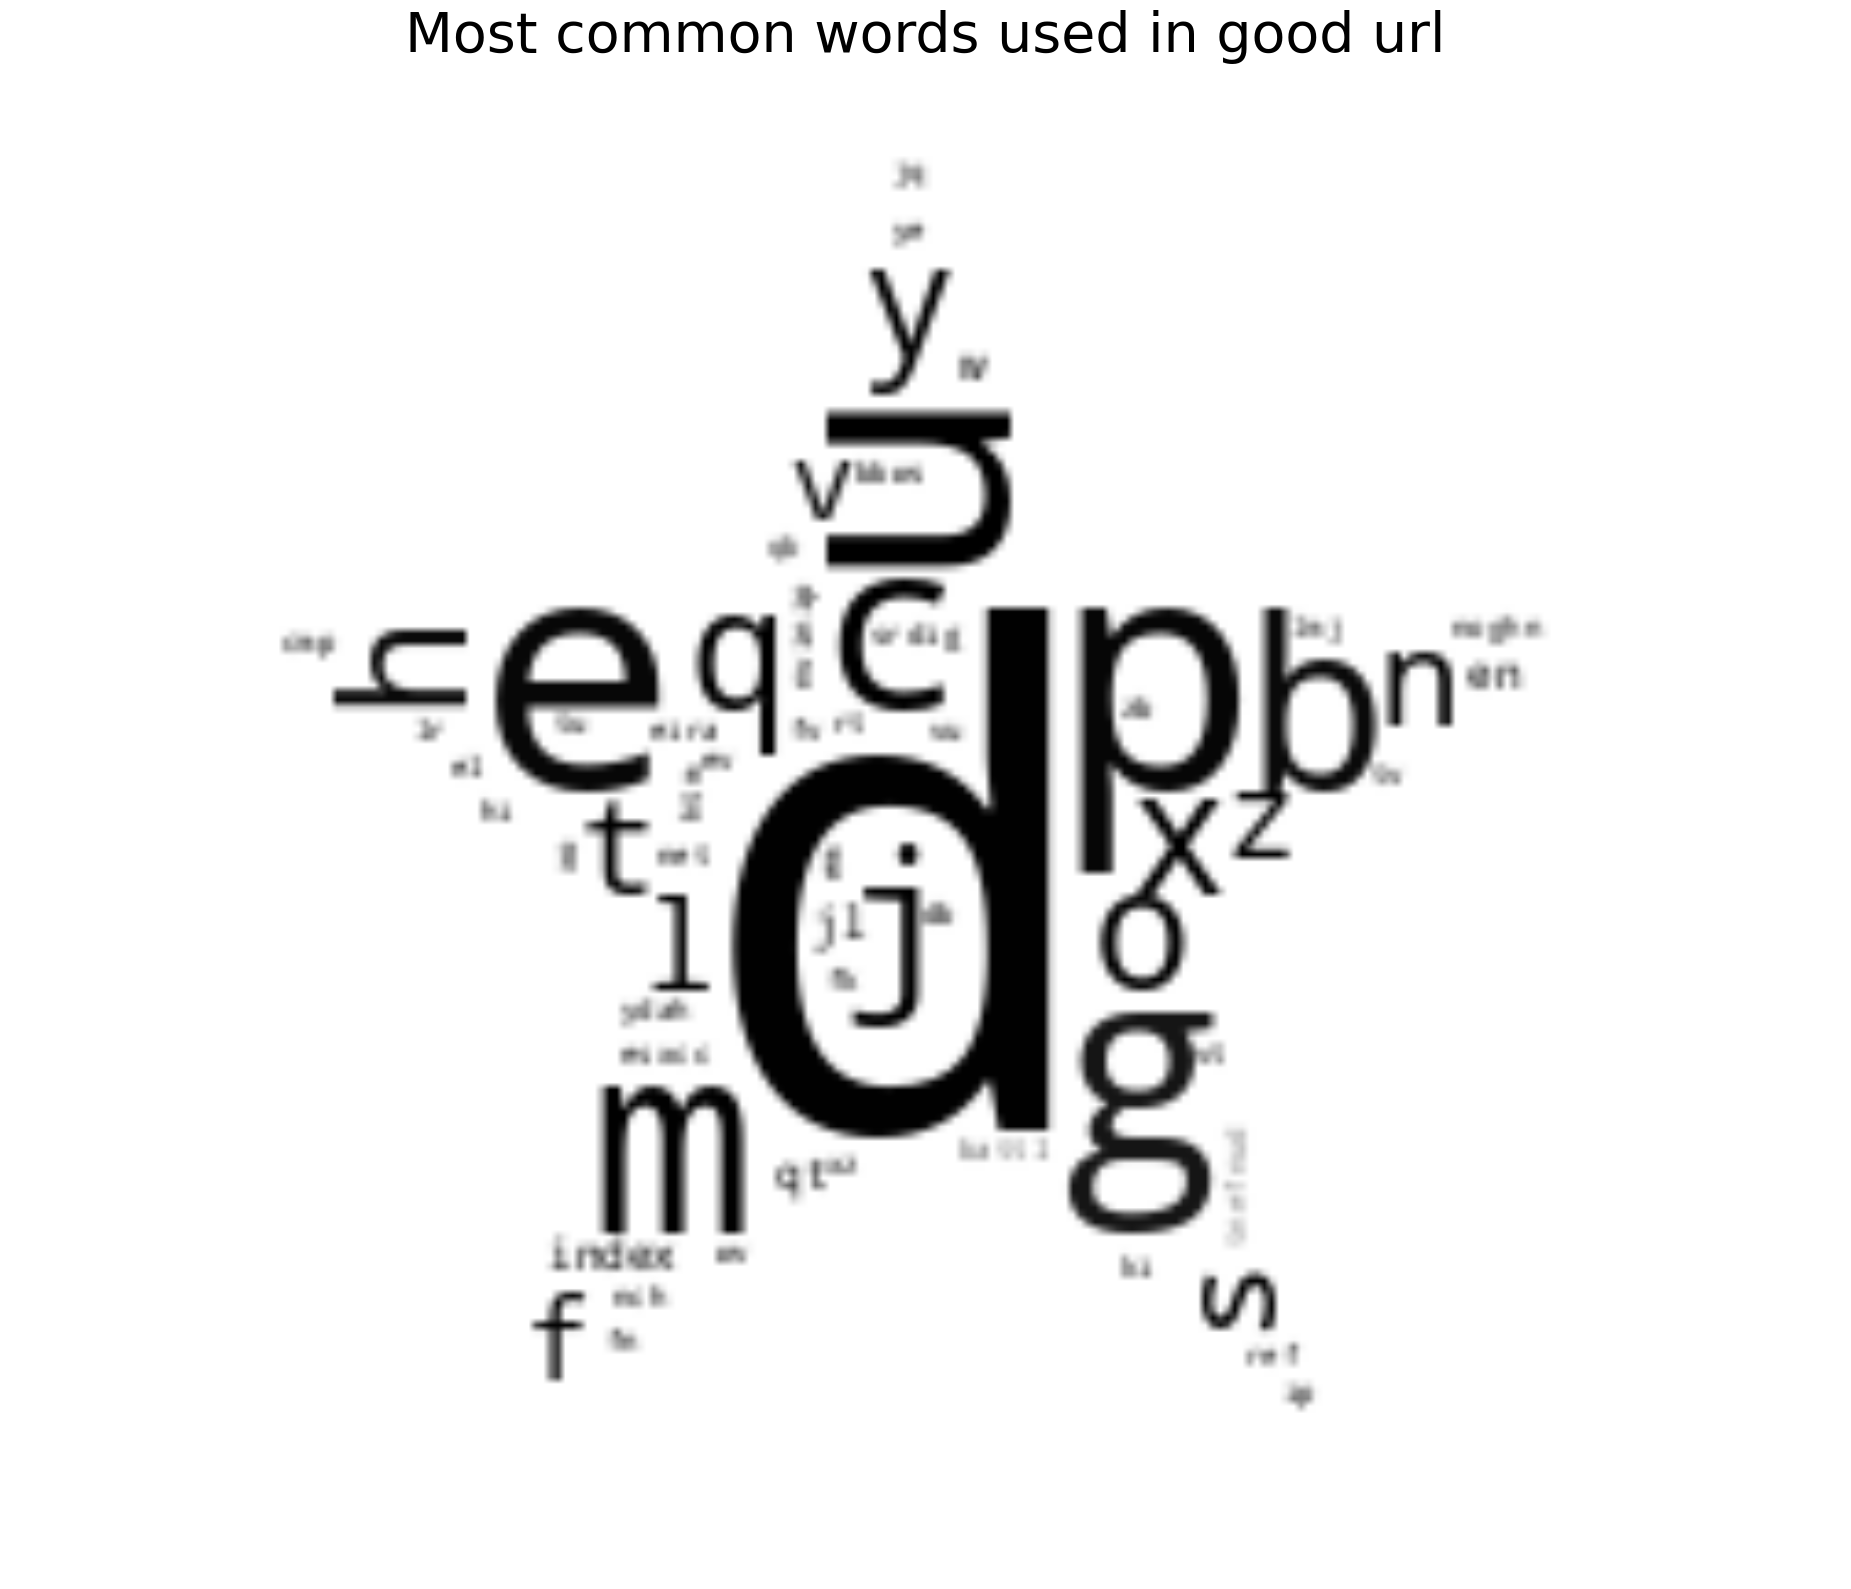

In [31]:
common_text=str(data1)
common_mask=np.array(Image.open('/content/drive/MyDrive/new shama trial/newstar.png'))
plot_word_cloud(common_text,mask=common_mask, max_words=400, max_font_size=100, figure_size=(24.0,16.0), title='Most common words used in good url', title_size=40, image_color=True)


Count Vectorizer

In [32]:
cv=CountVectorizer()

In [33]:
feature=cv.fit_transform(data.Joined_tokens)

In [34]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
trainx,testx,trainy,testy=train_test_split(feature, data.Label)

In [36]:
trainy

,Label
321130,good
510361,bad
298632,good
199534,good
456894,good
...,...
461669,good
268968,good
164024,good
69239,good


In [37]:
feature.shape

(549346, 350837)

In [38]:
lr=LogisticRegression()

In [39]:
lr.fit(trainx,trainy)

LogisticRegression()

In [40]:
lr.score(testx,testy)

0.9639354289084515

In [41]:
testx

<137337x350837 sparse matrix of type '<class 'numpy.int64'>'
	with 919730 stored elements in Compressed Sparse Row format>

In [42]:
Scores_ml={}
Scores_ml['Logistic Regression']=np.round(lr.score(testx,testy),2)




In [43]:
print('Training Accuracy :', lr.score(trainx,trainy))
print('Testing Accuracy:' ,lr.score(testx,testy))
con_mat=pd.DataFrame(confusion_matrix(lr.predict(testx),testy),
                     columns=['Predicted No','Predicted Yes'],
                     index=['Actual No','Actual Yes']) # Removed extra indent

print('Classification report')
print(con_mat)
print(classification_report(lr.predict(testx),testy,target_names=['bad','good'])) #Removed extra argument

Training Accuracy : 0.9782601836367653
Testing Accuracy: 0.9639354289084515
Classification report
            Predicted No  Predicted Yes
Actual No          35335           1208
Actual Yes          3745          97049
              precision    recall  f1-score   support

         bad       0.90      0.97      0.93     36543
        good       0.99      0.96      0.98    100794

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.97      0.96      0.96    137337



In [44]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(trainx,trainy)


MultinomialNB()

In [45]:
mnb.score(testx,testy)

0.9577535551235282

In [46]:
Scores_ml['Multinomial Naive bayes']=np.round(mnb.score(testx,testy),2)

In [47]:
print('Training Accuracy :', mnb.score(trainx,trainy))
print('Testing Accuracy:' ,mnb.score(testx,testy))
con_mat=pd.DataFrame(confusion_matrix(mnb.predict(testx),testy),
                     columns=['Predicted No','Predicted Yes'],
                     index=['Actual No','Actual Yes']) # Removed extra indent

print('Classification report')
print(con_mat)
print(classification_report(mnb.predict(testx),testy,target_names=['bad','good'])) #Removed extra argument

Training Accuracy : 0.9740345477890046
Testing Accuracy: 0.9577535551235282
Classification report
            Predicted No  Predicted Yes
Actual No          35733           2455
Actual Yes          3347          95802
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     38188
        good       0.98      0.97      0.97     99149

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337



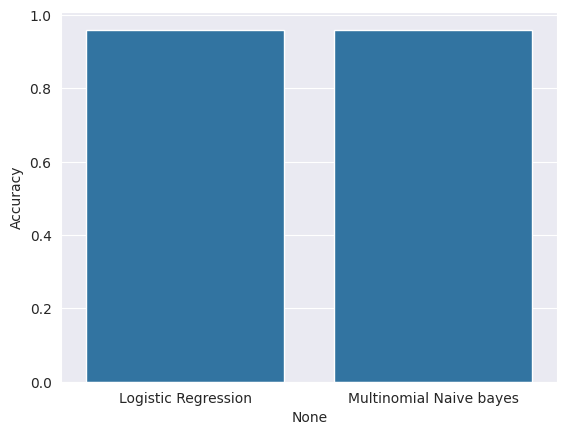

<Figure size 1500x1000 with 0 Axes>

In [48]:
acc=pd.DataFrame.from_dict(Scores_ml,orient='index', columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index,y=acc.Accuracy)
plt.figure(figsize=(15,10))
plt.show()

In [49]:
from sklearn.pipeline import make_pipeline
pipeline_ls=make_pipeline(CountVectorizer(tokenizer=RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'),LogisticRegression())

In [50]:
trainx,testx,trainy,testy=train_test_split(data.URL,data.Label)

In [51]:
pipeline_ls.fit(trainx,trainy)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [52]:
pipeline_ls.score(testx,testy)

0.9668916606595455

Training Accuracy : 0.9807577018948616
Testing Accuracy: 0.9668916606595455
Classification report
            Predicted No  Predicted Yes
Actual No          35604           1229
Actual Yes          3318          97186
              precision    recall  f1-score   support

         bad       0.91      0.97      0.94     36833
        good       0.99      0.97      0.98    100504

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


 CONFUSION MATRIX


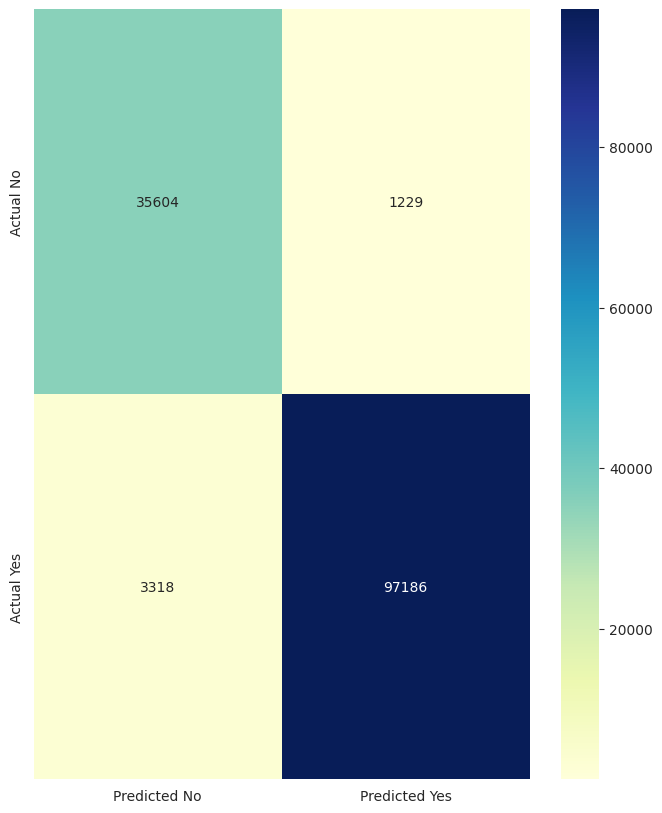

In [53]:
print('Training Accuracy :', pipeline_ls.score(trainx,trainy))
print('Testing Accuracy:' ,pipeline_ls.score(testx,testy))
con_mat=pd.DataFrame(confusion_matrix(pipeline_ls.predict(testx),testy),
                     columns=['Predicted No','Predicted Yes'],
                     index=['Actual No','Actual Yes']) # Removed extra indent

print('Classification report')
print(con_mat)
print(classification_report(pipeline_ls.predict(testx),testy,target_names=['bad','good'])) #Removed extra argument
print('\n CONFUSION MATRIX')
plt.figure(figsize=(8,10))
sns.heatmap(con_mat,annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [54]:
pipeline_ls

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [55]:
import pickle

In [56]:
pickle.dump(pipeline_ls,open('model.pkl','wb'))

In [57]:
pickle.dump(cv,open('cv.pkl','wb'))

In [58]:
pickle.dump(stemmer,open('stemmer.pkl','wb'))

In [59]:
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))

In [60]:
pickle.load(open('model.pkl','rb'))

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [61]:
pickle.load(open('cv.pkl','rb'))

CountVectorizer()

In [62]:
pickle.load(open('stemmer.pkl','rb'))

In [63]:
pickle.load(open('tokenizer.pkl','rb'))

RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)